In [ ]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.5/329.5 kB 11.6 MB/s eta 0:00:00


In [ ]:
from pypdf import PdfReader

# Lectura de documentos y creacion del corpus

In [ ]:
import requests


# URLs convertidas a la estructura correcta
urls_pdf = [
    "https://drive.google.com/uc?id=1-UXYsltO3-VyRhoQ7RyE7OxmsSLzrNKe",
    "https://drive.google.com/uc?id=1NV7-N_jzy-y8NNzSDdtPvqEwjvuGK4fZ",
    "https://drive.google.com/uc?id=1YKwN3pOGjh5LJD-BmVo0CQwY6MkfjTSf"]

corpus = {}

for i, url in enumerate(urls_pdf):
    try:
        print(f"Procesando archivo {i+1}...")

        # Descargar PDF
        response = requests.get(url)

        # Guardar con nombre único
        nombre_archivo = f"documento_{i+1}.pdf"
        with open(nombre_archivo, "wb") as f:
            f.write(response.content)

        # Leer PDF
        documento = PdfReader(nombre_archivo)
        paginas = []

        for page in documento.pages:
            txt = page.extract_text() or ""
            paginas.append(txt)

        texto_completo = "\n".join(paginas)
        corpus[f"doc_{i+1}"] = texto_completo

        print(f"✅ Archivo {i+1} procesado - {len(paginas)} páginas")

    except Exception as e:
        print(f"❌ Error con archivo {i+1}: {e}")

print(f"\n📚 Procesados {len(corpus)} archivos exitosamente")

# Mostrar resumen
for doc, texto in corpus.items():
    print(f"\n{doc}: {len(texto)} caracteres")
    print(f"Muestra: {texto[:100]}...")

Procesando archivo 1...
✅ Archivo 1 procesado - 2 páginas
Procesando archivo 2...
✅ Archivo 2 procesado - 2 páginas
Procesando archivo 3...
✅ Archivo 3 procesado - 3 páginas

📚 Procesados 3 archivos exitosamente

doc_1: 8620 caracteres
Muestra: 1  
El  Tenis:  Un  Deporte  de  Gracia,  Poder  y  Resistencia  Mental   El  tenis  es  un  deporte...

doc_2: 8432 caracteres
Muestra: 1  
El  Surrealismo:  Explorando  los  Laberintos  del  Inconsciente   El  Surrealismo,  uno  de  lo...

doc_3: 9746 caracteres
Muestra: 1  
La  Inteligencia  Artificial:  La  Nueva  Frontera  de  la  Innovación  Humana   La  Inteligenci...


# StopWords

In [ ]:
set_stopwords = set([
        'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una',
        'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre',
        'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo',
        'nos', 'durante', 'todos', 'uno', 'les',  # 50
        'ni',  # 51
        # Palabras adicionales
        "tú", "tus", "te", "ti", "tu", "vos", "vosotros", "vosotras", "ustedes", "su", "sus", "ello", "ellos",
        "ellas", "mío", "mía", "míos", "mías", "tuyo", "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos",
        "suyas", "nuestro", "nuestra", "nuestros", "nuestras",  # 80
        # Contracciones comunes
        "al",  # a + el
        "del"  # de + el
    ])

# Tokenizacion

In [ ]:
def tokenize_v4(text):
    #delimiters = string.whitespace + string.punctuation
    acentos_enye = set([
        193, 201, 205, 211, 218,  # Á, É, Í, Ó, Ú
        225, 233, 237, 243, 250,  # á, é, í, ó, ú
        209, 241,                 # Ñ, ñ
        220, 252                  # Ü, ü
    ])

    list_Mm = {193:225,#32
              201:233,#32
              205:237,#32
              211:243,#32
              218:250,#32
              209:241,#32
              220:252} #32

    set_numbers = set(range(48, 58))  # Números del 0 al 9
    set_abcdario = set(range(65, 91)).union(set(range(97, 123))).union(acentos_enye)  # Letras A-Z, a-z y letras con acentos y ñ


    token = ""
    tokens = [None]*len(text)
    count = 0

    #si la posion del texto es un delimitadir y es la ultima posicion
    #se sustituye
    if ord(text[-1]) not in set_abcdario or ord(text[-1]) not in set_numbers:
        text += '.'
        n = len(text)

    for i,char in enumerate(text):
        code = ord(char)

        # Si es letra mayúscula (A-Z), convierto a minúscula
        if 65 <= code <= 90:
            char = chr(code + 32)
        if code in list_Mm:
            char = chr(list_Mm[code])

        #si el caracter es una letra o numero entonces se almacena en token
        if(ord(char) in set_abcdario or ord(char) in set_numbers):
            token += char
            continue


        if token != "":
            # Limpieza: si hay letras, quitamos dígitos
            has_letter = False
            for c in token:
                if ord(c) in set_abcdario:
                    has_letter = True
                    break

            if has_letter:
                new_token = ""
                for c in token:
                    if ord(c) in set_abcdario:
                        new_token += c
                token = new_token
            # Si no tenía letras, es un número puro y se queda como está

            if token != "":
                if token not in set_stopwords:
                    tokens[count] = token
                    count += 1
            token = ""

    return tokens[0:count]

# Lemmas

In [ ]:
VOCALS = "aeiouáéíóúü"

In [ ]:
lemas_excepcciones = {
    #  SER
    'soy': 'ser', 'eres': 'ser', 'es': 'ser', 'somos': 'ser', 'son': 'ser',
    'era': 'ser', 'eras': 'ser', 'éramos': 'ser', 'eran': 'ser',
    'fui': 'ser', 'fuiste': 'ser', 'fue': 'ser', 'fuimos': 'ser', 'fueron': 'ser',
    'seré': 'ser', 'serás': 'ser', 'será': 'ser', 'seremos': 'ser', 'serán': 'ser',
    'sería': 'ser', 'serías': 'ser', 'seríamos': 'ser', 'serían': 'ser',
    'siendo': 'ser', 'sido': 'ser',

     #  ESTAR
    'estoy': 'estar', 'estás': 'estar', 'está': 'estar', 'estamos': 'estar', 'están': 'estar',
    'estaba': 'estar', 'estabas': 'estar', 'estábamos': 'estar', 'estaban': 'estar',
    'estuve': 'estar', 'estuviste': 'estar', 'estuvo': 'estar', 'estuvimos': 'estar', 'estuvieron': 'estar',
    'estaré': 'estar', 'estarás': 'estar', 'estará': 'estar', 'estaremos': 'estar', 'estarán': 'estar',
    'estaría': 'estar', 'estarías': 'estar', 'estaríamos': 'estar', 'estarían': 'estar',
    'estando': 'estar', 'estado': 'estar',
    # HABER
    'he': 'haber', 'has': 'haber', 'ha': 'haber', 'hemos': 'haber', 'han': 'haber',
    'había': 'haber', 'habías': 'haber', 'habíamos': 'haber', 'habían': 'haber',
    'hube': 'haber', 'hubiste': 'haber', 'hubo': 'haber', 'hubimos': 'haber', 'hubieron': 'haber',
    'habré': 'haber', 'habrás': 'haber', 'habrá': 'haber', 'habremos': 'haber', 'habrán': 'haber',
    'habría': 'haber', 'habrías': 'haber', 'habríamos': 'haber', 'habrían': 'haber',
    'habiendo': 'haber', 'habido': 'haber',

    # IR
    'voy': 'ir', 'vas': 'ir', 'va': 'ir', 'vamos': 'ir', 'van': 'ir',
    'iba': 'ir', 'ibas': 'ir', 'íbamos': 'ir', 'iban': 'ir',
    'fui': 'ir', 'fuiste': 'ir', 'fue': 'ir', 'fuimos': 'ir', 'fueron': 'ir',
    'iré': 'ir', 'irás': 'ir', 'irá': 'ir', 'iremos': 'ir', 'irán': 'ir',
    'iría': 'ir', 'irías': 'ir', 'iríamos': 'ir', 'irían': 'ir',
    'yendo': 'ir', 'ido': 'ir',

    # TENER
    'tengo': 'tener', 'tienes': 'tener', 'tiene': 'tener', 'tenemos': 'tener', 'tienen': 'tener',
    'tenía': 'tener', 'tenías': 'tener', 'teníamos': 'tener', 'tenían': 'tener',
    'tuve': 'tener', 'tuviste': 'tener', 'tuvo': 'tener', 'tuvimos': 'tener', 'tuvieron': 'tener',
    'tendré': 'tener', 'tendrás': 'tener', 'tendrá': 'tener', 'tendremos': 'tener', 'tendrán': 'tener',
    'tendría': 'tener', 'tendrías': 'tener', 'tendríamos': 'tener', 'tendrían': 'tener',
    'teniendo': 'tener', 'tenido': 'tener',



    'malas': 'malo',
    'malos': 'malo',
    'buenas': 'bueno',
    'buenos': 'bueno',
    'peliculas': 'pelicula',
    'actuaciones': 'actuación',
    'tramas': 'trama',
    'mejores': 'bueno',
    'influyentes': 'influyente',
    'embarcaron':'embarcar',
    'debates':'debate',
    'convierten':'convertir',
    'década':'década',
    'creyendo':'creer',
    'psicoanálisis':'psicoanálisis',
    'reprimidos':'reprimir',
    'definió': 'definir',
    'surgió': 'surgir',

    'influyó': 'influir',
    'incluyó': 'incluir',
    'contribuyó': 'contribuir',

    'surgió': 'surgir',
    'nació': 'nacer',
    'definió': 'definir',
    'convirtió': 'convertir',
    'dividió': 'dividir',
    'distinguió': 'distinguir',
    'extendió': 'extender',
    'disolvió': 'disolver',
    'exhibió': 'exhibir',
    'ofreció': 'ofrecer',
    'permitió': 'permitir',
    'rompió': 'romper',
    'suprimió': 'suprimir',
    'abrió': 'abrir',
    'estableció': 'establecer',
    'vieron': 'ver',
    'permitieron': 'permitir',
    'convirtieron': 'convertir',
    'abrieron': 'abrir',
    'surgieron': 'surgir',
    'establecieron': 'establecer',
    'propusieron': 'proponer',
}


In [ ]:
def reglas(palabra):
      ## verbos terminandos en ando
      n = len(palabra)
      if n > 4 and palabra[n-4:] == "ando":
          return palabra[:n-4] + "ar"

      if n > 3 and palabra[n-3:] == "aba":
          return palabra[:n-3] + "ar"

      elif n > 5 and palabra[n-5:] == "iendo":
          return palabra[:n-5] + "er"

      if n > 4 and palabra[n-4:] == "amos":
          return palabra[:n-4] + "ar"
      if n > 4 and palabra[n-4:] == "emos":
          return palabra[:n-4] + "er"
      if n > 4 and palabra[n-4:] == "imos":
          return palabra[:n-4] + "ir"

      if n > 4 and (palabra[n-3:] == "ado" or palabra[n-3:] == "ada"):
        return palabra[:n-3] + "ar"
      if n > 5 and (palabra[n-4:] == "ados" or palabra[n-4:] == "adas"):
        return palabra[:n-4] + "ar"

      if n > 4 and (palabra[n-3:] == "ido" or palabra[n-3:] == "ida"):
        return palabra[:n-3] + "er"
      if n > 5 and (palabra[n-4:] == "idos" or palabra[n-4:] == "idas"):
        return palabra[:n-4] + "er"


      if n > 4 and palabra[n-3:] == "ces":
          return palabra[:n-3] + "z"
      #if n > 4 and palabra[n-3:] == "les":
      # return palabra[:n-3]

      if n > 4 and palabra[n-4:] == "ones":
        return palabra[:n-4] + "ón"
      if n > 3 and palabra[n-2:] == "es" and palabra[n-3] not in VOCALS:
          return palabra[:n-2]

      if (n > 2 and palabra[n-1:] == "s" and
        palabra[n-2] in VOCALS and
        not (palabra[n-4:] == "amos" or palabra[n-4:] == "emos" or palabra[n-4:] == "imos"
             or palabra[n-2:] == "ís" or palabra[n-2:] == "ús")):
        return palabra[:n-1]

      if n > 3 and palabra[n-2:] == "as" and palabra[n-3] in VOCALS:
          return palabra[:n-1]
      if n > 3 and palabra[n-2:] == "os" and palabra[n-3] in VOCALS:
          return palabra[:n-1]

      if n > 7 and palabra[n-5:] == "mente":
        return palabra[:n-5]

      if n > 2 and palabra[n-1:] == "ó":
        return palabra[:n-1] + "ar"

      if n > 5 and palabra[n-4:] == "aron":
        return palabra[:n-4] + "ar"

      return palabra

In [ ]:
def lematizacion_reglas_excepciones(palabra):
    if palabra in lemas_excepcciones:
        return lemas_excepcciones[palabra]
    return reglas(palabra)

In [ ]:
def lematizar(texto): #Recibe documento tokenizado
    resultado = [None]*len(texto)
    for i in range(len(texto)):
        lema = lematizacion_reglas_excepciones(texto[i])
        if lema is None:
            lema = tokens[i]
        resultado[i] = lema
    return resultado

# Palabras unicas

In [ ]:
def PalabrasUnicas(tokens):
  palabras = []
  for token in tokens:
    if token not in palabras:
      palabras.append(token)

  return palabras

# BoW

In [ ]:
"""def bow(corpus,palabras_unicas):
    vect_bow = [[0]*len(palabras_unicas) for _ in range(len(corpus))]
    for i, doc in enumerate(corpus):
        for palabra in doc:
            idx_pal = palabras_unicas.index(palabra)
            vect_bow[i][idx_pal] += 1
    return vect_bow
"""
import numpy as np

def bow(corpus,vector_unico):
  num_doc_corpus =len(corpus)
  total_vector_unico=len(vector_unico)
  matriz_BOW =np.zeros((num_doc_corpus,total_vector_unico))
  for i in range(num_doc_corpus):
    j = 0
    for pal_unico in vector_unico:
      for pal in corpus[i]:
        if pal == pal_unico:
          matriz_BOW[i,j]= matriz_BOW[i,j]+1
      j=j+1
  return matriz_BOW

# Matriz de CO-CURRENCIA

In [ ]:
def indices_matriz(vocabulario,palabra):
  for j in range(len(vocabulario)):
    if palabra == vocabulario[j]:
      return j

In [ ]:
def similitud_coseno(palabra1, palabra2, matriz_concurrencia,texto):
  texto_tokenizado = tokenize_v4(texto)
  vocabulario = PalabrasUnicas(texto_tokenizado)

  indice_palabra1 = indices_matriz(vocabulario,palabra1)
  indice_palabra2 = indices_matriz(vocabulario,palabra2)

  vec_palabra1=matriz_concurrencia[indice_palabra1]
  vec_palabra2=matriz_concurrencia[indice_palabra2]

  producto_punto = np.dot(vec_palabra1, vec_palabra2)
  norma_palabra1 = np.linalg.norm(vec_palabra1)
  norma_palabra2 = np.linalg.norm(vec_palabra2)
  cos_sim = producto_punto / norma_palabra1 * norma_palabra2
  return cos_sim


In [ ]:
#grado de correlación: se mide al sumar todos los valores de cada vector asociado a una palabra
def grado_de_concurrencia(matriz_concurrencia,texto_tokenizado,vocabulario):
  vector_concurrencia_palabras_unicas = np.zeros(len(vocabulario))
  vector_odenado_concurrencia = np.empty(len(vocabulario),dtype=object)

  for palabra in vocabulario:
    indice_palabra = indices_matriz(vocabulario,palabra)
    vec_palabra = matriz_concurrencia[indice_palabra]
    #print(palabra)
    #print(vec_palabra)
    vector_concurrencia_palabras_unicas[indice_palabra] = np.sum(vec_palabra)

  vector_concurrencia_palabras_unicas_ordenado = np.sort(vector_concurrencia_palabras_unicas)
  vector_concurrencia_palabras_unicas_ordenado_indices = np.argsort(-vector_concurrencia_palabras_unicas)

  for i in range(len(vocabulario)):
    indice_original = vector_concurrencia_palabras_unicas_ordenado_indices[i]
    vector_odenado_concurrencia[i] = vocabulario[indice_original]

  return vector_odenado_concurrencia

In [ ]:
def matriz_concurrencia(vocabulario,texto_tokenizado):
  matriz_concurrencia=np.zeros((len(vocabulario),len(vocabulario)))

  for i in range(len(texto_tokenizado)-1):
    palabra = texto_tokenizado[i]
    palabra_que_sigue = texto_tokenizado[i+1]

    indice_palabra_actual = indices_matriz(vocabulario,palabra)
    indice_palabra_que_sigue = indices_matriz(vocabulario,palabra_que_sigue)

    if indice_palabra_actual ==indice_palabra_que_sigue:
      matriz_concurrencia[indice_palabra_actual][indice_palabra_que_sigue] += 1
    else:
      matriz_concurrencia[indice_palabra_actual][indice_palabra_que_sigue] += 1
      matriz_concurrencia[indice_palabra_que_sigue][indice_palabra_actual] += 1
  return matriz_concurrencia

#PRACTICA

## Preprocesameinto y Matriz de co-ocureencia

In [ ]:
print(type(corpus))
print(corpus.keys())

<class 'dict'>
dict_keys(['doc_1', 'doc_2', 'doc_3'])


In [ ]:
# Tokenización del corpus
#doc1_tokenizado = tokenize_v4(corpus["doc_1"])
#doc2_tokenizado = tokenize_v4(corpus["doc_2"])
#doc3_tokenizado = tokenize_v4(corpus["doc_3"])

#Concatenamos el corpus
corpus_concat=corpus["doc_1"]+corpus["doc_2"]+corpus["doc_3"]

#Tokenizamos el corpus
todos_los_tokens = tokenize_v4(corpus_concat)

#Lematizamos el corpus
corpus_lematizado = lematizar(todos_los_tokens)

#Creación del vector de palabras unicas
vocabulario = PalabrasUnicas(corpus_lematizado)

#Creación de la matriz de concurrencia
m_c = matriz_concurrencia(vocabulario, corpus_lematizado)

print(f"Hay {len(vocabulario)} palabras únicas.")


Hay 1113 palabras únicas.


In [ ]:
print(vocabulario)

['1', 'teni', 'deporte', 'gracia', 'poder', 'resistencia', 'mental', 'ser', 'combina', 'manera', 'única', 'atlética', 'explosivo', 'finura', 'técnica', 'formidable', 'fortaleza', 'jugar', 'millón', 'persona', 'mundo', 'tanto', 'nivel', 'recreativo', 'profesional', 'verdadera', 'global', 'circuito', 'viaja', 'sei', 'continent', 'largo', 'año', 'diferencia', 'mucho', 'deport', 'equipo', 'batalla', 'fundamental', 'individual', 'duelo', 'contra', 'do', 'dobl', 'pone', 'prueba', 'solo', 'habilidad', 'física', 'jugador', 'sino', 'capacidad', 'elaborar', 'estrategia', 'resolver', 'problema', 'bajo', 'presión', 'mantener', 'compostura', 'momento', 'crítico', 'intensidad', 'psicológica', 'característica', 'hacen', 'espectáculo', 'tan', 'cautivador', 'orígen', 'moderno', 'remontan', 'jeu', 'paume', 'juego', 'palma', 'pelota', 'mano', 'popular', 'nobleza', 'francesa', 'británica', 'siglo', 'xii', 'versión', 'moderna', 'original', 'llamar', 'hierba', 'lawn', 'tenni', 'ir', 'desarrollar', 'inglater

In [ ]:
m_c

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
grado_de_C=grado_de_concurrencia(m_c,corpus_lematizado,vocabulario)
# Crea un nuevo objeto de lista de Python con los primeros 5 elementos
top50 = grado_de_C[:50].tolist()
print(top50)

['ser', 'teni', 'haber', 'ia', 'estar', 'surrealismo', 'jugador', 'juego', 'ir', 'aprendizaje', 'dato', 'imágen', 'artificial', 'deporte', 'inteligencia', 'movimiento', 'mundo', 'técnica', 'grand', 'cada', 'gran', 'profesional', 'siglo', 'sistema', 'inconsciente', 'realidad', 'problema', 'sino', 'embargo', 'surrealista', 'campo', 'capacidad', 'esto', 'puede', 'humano', 'año', 'preocupación', 'automático', 'mucho', 'forma', 'tr', 'femenino', 'solo', 'profundo', 'mayor', 'mental', 'torneo', 'abierto', 'humanidad', 'modelo']


In [ ]:
#m_c[1]

In [ ]:
matriz_top = []
np.set_printoptions(threshold=np.inf) #linea para poder imprimir todo

for palabra in top50:
    indice = indices_matriz(vocabulario,palabra)
    matriz_top.append(m_c[indice])

matriz_top = np.array(matriz_top)

In [ ]:
print(matriz_top)

[[0. 5. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 2. 0. 1. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 8. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

## TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(matriz_top)
print(tsne_result)


[[ -70.30875     -22.901173     10.42997   ]
 [ -65.89738    -100.52281      -0.14932185]
 [-121.79956     -45.045734    -25.965513  ]
 [ -10.789549    -31.40664      22.099197  ]
 [  66.8163      -30.43634       4.0671515 ]
 [  93.19353       1.582775     86.43073   ]
 [  13.05728       3.4415414  -105.71473   ]
 [ -52.089424    -33.467377    -95.76864   ]
 [ 125.13391     -34.335884     29.617937  ]
 [ -58.641315     39.56597    -124.213776  ]
 [ -14.295223     86.9003      -58.87879   ]
 [  84.937325     18.116335    -55.09098   ]
 [ -38.088886    128.9066       -9.5713625 ]
 [ -93.65724     -72.62071     -14.770732  ]
 [ 110.3312      -67.82653      43.83796   ]
 [  30.813248     74.99298      76.03624   ]
 [ -62.810875      4.789017    109.78858   ]
 [ -85.42886     -47.542465     73.42715   ]
 [ -37.85266      34.562706     -5.391324  ]
 [  -7.5333576    43.60977     103.96192   ]
 [  82.974106     65.43631      94.37936   ]
 [ -71.27978      14.887108    -47.995953  ]
 [  25.498

## Graficar en 3D todas las max 50 palabras mas relevantes considerando su grado de similitud

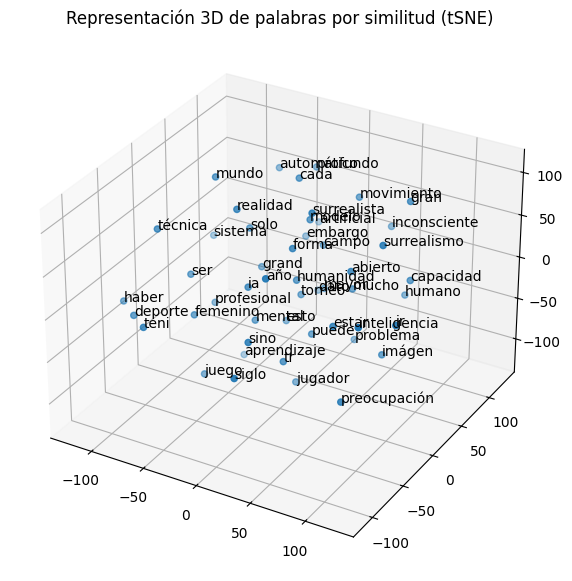

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(tsne_result[:,0], tsne_result[:,1], tsne_result[:,2])

for i, word in enumerate(top50):
    ax.text(tsne_result[i,0], tsne_result[i,1], tsne_result[i,2], word)

ax.set_title("Representación 3D de palabras por similitud (tSNE)")
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

df = pd.DataFrame(tsne_result, columns=['X', 'Y', 'Z'])
# 2. Asignar las palabras
df['Word'] = top50

# 3. Crear el gráfico 3D interactivo
fig = px.scatter_3d(df,
                    x='X',
                    y='Y',
                    z='Z',
                    # 'Word' será lo que se muestre al pasar el ratón (hover)
                    text='Word',
                    title="Representación 3D de palabras por similitud (tSNE) - Plotly")
fig.update_traces(marker_size=3)
fig.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Inicializar PCA para reducir a 3 componentes
pca = PCA(n_components=3, random_state=42)

# Aplicar PCA a la matriz de las palabras seleccionadas
# 'matriz_top' es el array NumPy que creaste anteriormente
pca_result = pca.fit_transform(matriz_top)

# Imprimir el resultado de la reducción
print("Forma de los datos originales:", matriz_top.shape)
print("Forma de los datos reducidos con PCA:", pca_result.shape)
print(pca_result)

#Mostrar la varianza explicada por los 3 componentes
print("\nVarianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", np.sum(pca.explained_variance_ratio_))

Forma de los datos originales: (50, 1113)
Forma de los datos reducidos con PCA: (50, 3)
[[ 1.37303852e+01 -1.84814648e+00  2.31516560e-01]
 [ 1.81050163e+00  5.60721894e+00 -4.09951544e+00]
 [ 6.40051327e-01  7.94018611e+00 -9.24171003e-02]
 [ 5.61518149e-01  4.32650157e+00  6.04975176e+00]
 [ 2.56666142e-01 -9.08657773e-01 -2.80509863e-01]
 [ 1.05070867e-01 -7.72100184e-01 -3.96947330e-02]
 [-4.75132289e-01 -4.69077036e-01 -5.20389228e-01]
 [-3.03245703e-01  1.56083008e-01 -2.04670947e-01]
 [-5.13233086e-01 -8.44541457e-01  4.78477834e-01]
 [-7.76668624e-01 -8.63709146e-01  3.83597833e-01]
 [-2.90908536e-02  1.03429644e+00  1.23878876e-01]
 [-6.69870983e-01  1.08474173e-01 -8.60218488e-02]
 [-3.63694320e-01  1.36283537e+00 -2.55864249e-01]
 [ 2.85487436e-01  2.09187570e+00 -3.78254057e-01]
 [ 2.63112960e-01 -1.05446281e+00  2.31569361e+00]
 [-6.40571608e-01 -7.13008357e-01 -1.40283176e-01]
 [-6.50518973e-01 -7.90388140e-01 -3.00849536e-01]
 [-1.24657025e-01 -8.73965685e-01 -1.35920041

In [ ]:
import plotly.express as px
import pandas as pd
# 1. Crear un DataFrame
df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

df['Word'] = top50

# 2. Crear el gráfico 3D interactivo
fig = px.scatter_3d(df,
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    text='Word',
                    title="Representación 3D de palabras por similitud (PCA)",
                    )
figsize=(15, 10)
fig.update_traces(marker_size=2, textposition='top center')
fig.show()